In [210]:
from langgraph.graph import StateGraph, MessagesState, START, END
from IPython.display import Image, display

In [211]:
# Step 1: Define agent functions
# -----------------------------
def current_stage_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "current stage of the crop"})
    return {"messages": state.messages, "data": state.data}

def past_stages_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "current stage of the crop"})
    return {"messages": state.messages, "data": state.data}
def future_stage_output(state: MessagesState):
    state.messages.append({"role": "ai", "content": "current stage of the crop"})
    return {"messages": state.messages, "data": state.data}
def final_stage_output(state: MessagesState):
    state.messages.append({"role": "ai", "content": "current stage of the crop"})
    return {"messages": state.messages, "data": state.data}
def soil_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Soil agent processed"})
    return {"messages": state.messages, "data": state.data}

def water_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Water agent processed"})
    return {"messages": state.messages, "data": state.data}

def weather_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Weather agent processed"})
    return {"messages": state.messages, "data": state.data}

def stage_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Stage agent processed"})
    return {"messages": state.messages, "data": state.data}

def pest_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Pest & Disease agent processed"})
    return {"messages": state.messages, "data": state.data}

def nutrient_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Nutrient/Fertilizer agent processed"})
    return {"messages": state.messages, "data": state.data}

def alert_and_risk_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Alert agent processed"})
    return {"messages": state.messages, "data": state.data}

def merge_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Merge agent processed"})
    return {"messages": state.messages, "data": state.data}

def validation_agent(state: MessagesState):
    state.messages.append({"role": "ai", "content": "Validation agent processed"})
    return {"messages": state.messages, "data": state.data}


In [212]:
# Step 2: Create StateGraph and add nodes
# -----------------------------
graph = StateGraph(MessagesState)

agents = {
    "current_stage_agent":current_stage_agent,
    "past_stages_agent":past_stages_agent,
    "future_stage_output":future_stage_output,
    "final_stage_output": final_stage_output,
    "soil_agent": soil_agent,
    "water_agent": water_agent,
    "weather_agent": weather_agent,
    "stage_agent": stage_agent,
    "pest_agent": pest_agent,
    "nutrient_agent": nutrient_agent,
    "alert_and_risk_agent": alert_and_risk_agent,
    "merge_agent": merge_agent,
    "validation_agent": validation_agent
}

for name, func in agents.items():
    graph.add_node(name, action=func)

In [213]:
# Step 3: Define parallel workflow
# -----------------------------
# Independent agents start in parallel
graph.add_edge(START, "soil_agent")
graph.add_edge(START, "water_agent")
graph.add_edge(START, "weather_agent")

# Stage depends on Soil, Water, Weather
# graph.add_edge("current_stage_agent", "stage_agent")
graph.add_edge("soil_agent", "stage_agent")
graph.add_edge("water_agent", "stage_agent")
graph.add_edge("weather_agent", "stage_agent")

graph.add_edge("current_stage_agent","stage_agent")
graph.add_edge("past_stages_agent", "stage_agent")
graph.add_edge("future_stage_output", "stage_agent")

graph.add_edge("current_stage_agent","final_stage_output")
graph.add_edge("past_stages_agent","final_stage_output")
graph.add_edge("future_stage_output","final_stage_output")

# Pest and Nutrient agents depend on Soil/Water/Weather or Stage
# graph.add_edge("soil_agent", "pest_agent")
graph.add_edge("final_stage_output", "pest_agent")
graph.add_edge("weather_agent", "pest_agent")
graph.add_edge("soil_agent", "nutrient_agent")
graph.add_edge("final_stage_output", "nutrient_agent")

# Alert agent depends on Pest, Nutrient, Weather
graph.add_edge("pest_agent", "alert_and_risk_agent")
graph.add_edge("nutrient_agent", "alert_and_risk_agent")
graph.add_edge("water_agent", "alert_and_risk_agent")

# Merge agent collects outputs from Stage, Pest, Nutrient, Alert
graph.add_edge("current_stage_agent", "merge_agent")
graph.add_edge("soil_agent", "merge_agent")
graph.add_edge("water_agent", "merge_agent")
graph.add_edge("weather_agent", "merge_agent")
graph.add_edge("final_stage_output", "merge_agent")
graph.add_edge("pest_agent", "merge_agent")
graph.add_edge("nutrient_agent", "merge_agent")
graph.add_edge("alert_and_risk_agent", "merge_agent")

# # Validation comes after merge
graph.add_edge("merge_agent", "validation_agent")

# END
graph.add_edge("validation_agent", END)
graph.add_edge("merge_agent", END)  # Optional if merge can directly end


In [214]:
# Step 4: Compile and visualize
graph = graph.compile()

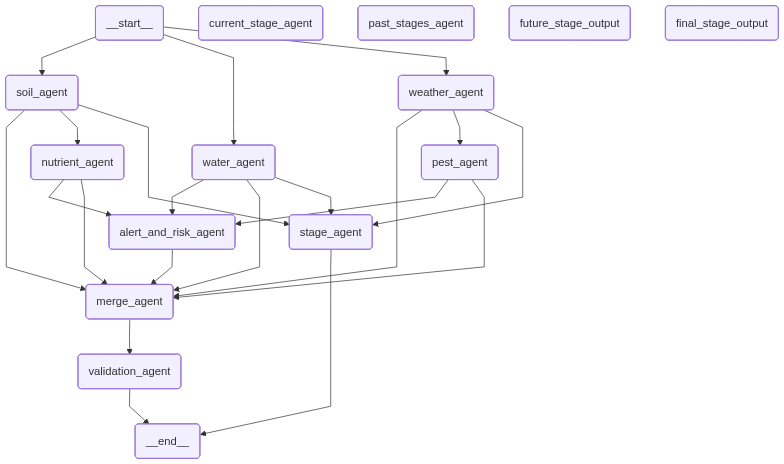

In [215]:
display(Image(graph.get_graph().draw_mermaid_png()))